# Analítica Avanzada de Datos.
---

# Regresión - Experimentación con modelos adicionales

En el cuaderno anterior, utilizamos modelos de regresión simples para observar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este cuaderno, experimentaremos con modelos más complejos para mejorar el rendimiento de nuestra regresión.

Empezaremos cargando los datos de alquiler de bicicletas como un DataFrame de **Pandas** y visualizando las primeras filas. También dividiremos nuestros datos en conjuntos de datos de entrenamiento y de prueba.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Cargar el conjunto de entrenamiento
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separamos características y etiquetas
# Después de separar el conjunto de datos, ahora tenemos matrices numpy llamadas **X** que contienen las características, y **y** que contienen las etiquetas.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Dividir los datos 70%-30% en conjunto de entrenamiento y conjunto de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


Ahora tenemos los siguientes cuatro conjuntos de datos:

- **X_train**: Los valores de las características que utilizaremos para entrenar el modelo
- **y_train**: Las etiquetas correspondientes que utilizaremos para entrenar el modelo.
- **X_test**: Los valores de las características que utilizaremos para validar el modelo
- **y_test**: Las etiquetas correspondientes que utilizaremos para validar el modelo.

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento.

## Experimentar con Algoritmos

El algoritmo de regresión lineal que utilizamos la última vez para entrenar el modelo tiene cierta capacidad predictiva, pero hay muchos tipos de algoritmo de regresión que podríamos probar, entre ellos:

- **Algoritmos lineales**: No sólo el algoritmo de regresión lineal que utilizamos anteriormente (que técnicamente es un algoritmo de mínimos cuadrados ordinarios), sino otras variantes como *Lasso* y *Ridge*.
- **Algoritmos basados en árboles**: Algoritmos que construyen un árbol de decisión para llegar a una predicción. (https://www.ibm.com/mx-es/topics/decision-trees)
- **Algoritmos de ensemble**: Algoritmos que combinan los resultados de varios algoritmos base para mejorar la generalizabilidad (https://scikit-learn.org/stable/modules/ensemble.html).


### Probemos otro algoritmo lineal 

Intentemos entrenar nuestro modelo de regresión utilizando un algoritmo **Lasso** (https://www.youtube.com/watch?v=bPFjfZWWQO0). Podemos hacerlo simplemente cambiando el estimador en el código de entrenamiento.

Lasso() 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


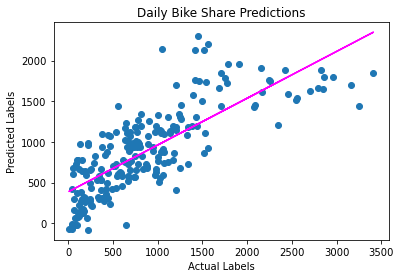

In [2]:
from sklearn.linear_model import Lasso

# Ajustar un modelo lasso en el conjunto de entrenamiento
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluar el modelo utilizando los datos de prueba
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicción vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Probar un algoritmo de árbol de decisión

Como alternativa a un modelo lineal, existe una categoría de algoritmos para el aprendizaje automático que utiliza un enfoque basado en árboles en el que las características del conjunto de datos se examinan en una serie de evaluaciones, cada una de las cuales da lugar a una rama en un *árbol de decisión* basado en el valor de la característica. Al final de cada serie de ramas se encuentran los nodos hoja con el valor de la etiqueta predicha en función de los valores de las características.

Es más fácil ver cómo funciona esto con un ejemplo. Vamos a entrenar un modelo de regresión de árbol de decisión utilizando los datos de alquiler de bicicletas. Después de entrenar el modelo, el código siguiente imprimirá la definición del modelo y una representación de texto del árbol que utiliza para predecir los valores de las etiquetas.

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Entrenamos el modelo
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualizamos el modelo
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_7 <= 0.26
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |   |--- feature_7 >  0.26
|   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |--- feature_8 <= 0.37
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_8 >  0.37
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |--- feature_7 <= 0.28
|   |   |   |   |   |   |   |--- value: [532.00]
|   |   |   |   |   |   |--- feature_7 >  0.28
|   |   |   |   |   |   |   |--- val

Ya tenemos un modelo basado en árboles, pero ¿es bueno? Evaluémoslo con los datos de prueba.

MSE: 251594.14545454545
RMSE: 501.59161222507043
R2: 0.5067654688014069


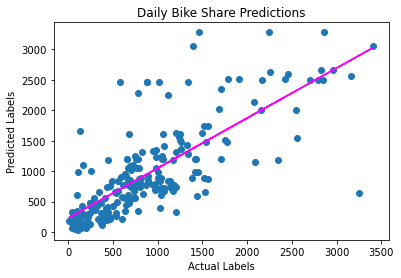

In [4]:
# Evaluamos el modelo usando los valores de prueba
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfica predicho vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# superponemos la linea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

El modelo basado en árboles no parece haber mejorado con respecto al modelo lineal, así que probemos otro modelo

### Algoritmos de esemble (ensemble algorithms)

Los algoritmos de ensamble funcionan combinando múltiples estimadores de base para producir un modelo óptimo, ya sea aplicando una función agregada a una colección de modelos de base (lo que a veces se denomina *bagging*) o construyendo una secuencia de modelos que se basan unos en otros para mejorar el rendimiento predictivo (lo que se denomina *boosting*).

Por ejemplo, probemos un modelo *RandomForest*, que aplica una función de promediación a varios modelos de Árbol de Decisión para obtener un modelo global mejor.

RandomForestRegressor() 

MSE: 112330.4021481818
RMSE: 335.15727971831643
R2: 0.7797832968537111


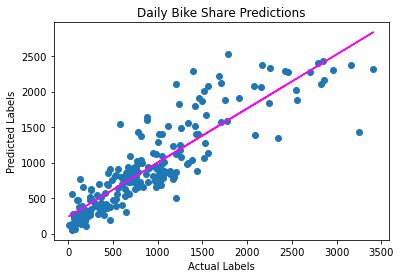

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluar el modelo con los datos de prueba
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

#Gráfico predicción vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()